In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# New section

In [ ]:
df = pd.read_csv('/content/hotel_booking.csv')
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,03-07-2015


In [ ]:
df.shape

(88362, 32)

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88362 entries, 0 to 88361
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           88362 non-null  object 
 1   is_canceled                     88362 non-null  int64  
 2   lead_time                       88362 non-null  int64  
 3   arrival_date_year               88362 non-null  int64  
 4   arrival_date_month              88362 non-null  object 
 5   arrival_date_week_number        88362 non-null  int64  
 6   arrival_date_day_of_month       88362 non-null  int64  
 7   stays_in_weekend_nights         88362 non-null  int64  
 8   stays_in_week_nights            88362 non-null  int64  
 9   adults                          88362 non-null  int64  
 10  children                        88358 non-null  float64
 11  babies                          88362 non-null  int64  
 12  meal                            

In [ ]:
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])

<ipython-input-17-8ed662810bf6>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88362 entries, 0 to 88361
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           88362 non-null  object        
 1   is_canceled                     88362 non-null  int64         
 2   lead_time                       88362 non-null  int64         
 3   arrival_date_year               88362 non-null  int64         
 4   arrival_date_month              88362 non-null  object        
 5   arrival_date_week_number        88362 non-null  int64         
 6   arrival_date_day_of_month       88362 non-null  int64         
 7   stays_in_weekend_nights         88362 non-null  int64         
 8   stays_in_week_nights            88362 non-null  int64         
 9   adults                          88362 non-null  int64         
 10  children                        88358 non-null  float64       
 11  ba

In [ ]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,88362,88362,88362,87875,88362,88362,88362,88362,88361,88361,88361
unique,2,12,5,157,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,48302,9807,69189,43363,38282,72121,63154,53773,73622,65302,44183


In [ ]:
for col in df.describe(include='object').columns:
  print("COL_NAME->",col)
  print("UNIQUE_VALUES->",df[col].unique())
  print('----------------------------------------------------')

COL_NAME-> hotel
UNIQUE_VALUES-> ['Resort Hotel' 'City Hotel']
----------------------------------------------------
COL_NAME-> arrival_date_month
UNIQUE_VALUES-> ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
----------------------------------------------------
COL_NAME-> meal
UNIQUE_VALUES-> ['BB' 'FB' 'HB' 'SC' 'Undefined']
----------------------------------------------------
COL_NAME-> country
UNIQUE_VALUES-> ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZ

In [ ]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             487
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          1
agent                             13225
company                           83102


In [ ]:
columns_to_drop=['agent','company']
df=df.drop(columns=(columns_to_drop))

In [ ]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           487
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        1
days_in_waiting_list                1
customer_type                       1
adr                                 1
required_car

In [ ]:
columns_to_drop=['country','children']
df=df.drop(columns=(columns_to_drop))

In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      1
days_in_waiting_list              1
customer_type                     1
adr                               1
required_car_parking_spaces       1
total_of_special_requests         1
reservation_status                1
reservation_status_date     

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,88362.000000,88362.000000,88362.000000,88362.000000,88362.000000,88362.000000,88362.000000,88362.000000,88362.000000,88362.000000,88362.000000,88362.000000,88362.000000,88361.000000,88361.000000,88361.000000,88361.000000
mean,0.499966,108.115728,2016.034257,27.169756,15.767400,0.962914,2.617098,1.852323,0.008397,0.035241,0.115502,0.157760,0.203787,2.883274,97.399741,0.069816,0.474236
std,0.500003,110.328351,0.728648,13.932590,8.788914,1.039794,2.036001,0.592656,0.102026,0.184390,0.977325,1.660222,0.631874,19.684736,52.833509,0.258541,0.743431
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,19.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,0.000000,0.000000
50%,0.000000,72.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,89.000000,0.000000,0.000000
75%,1.000000,167.000000,2017.000000,39.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,120.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


<Axes: >

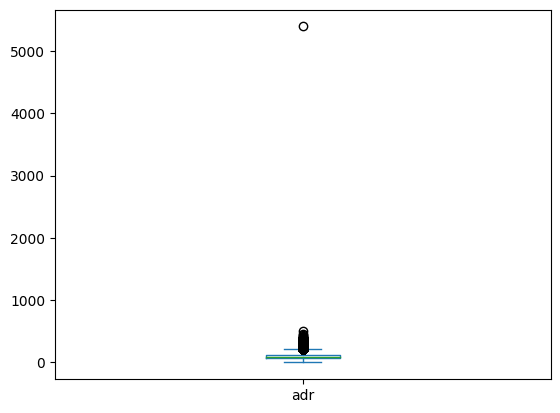

In [ ]:
df['adr'].plot(kind='box')

In [ ]:
df=df[df['adr']<5000]

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,88360.000000,88360.000000,88360.000000,88360.000000,88360.000000,88360.000000,88360.000000,88360.000000,88360.000000,88360.000000,88360.000000,88360.000000,88360.000000,88360.000000,88360.000000,88360.000000,88360.000000
mean,0.499966,108.117429,2016.034258,27.170009,15.767451,0.962924,2.617123,1.852320,0.008397,0.035242,0.115505,0.157764,0.203780,2.883307,97.339730,0.069817,0.474242
std,0.500003,110.329020,0.728656,13.932639,8.788837,1.039801,2.036016,0.592662,0.102027,0.184392,0.977335,1.660241,0.631875,19.684845,49.731157,0.258543,0.743433
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,19.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,0.000000,0.000000
50%,0.000000,72.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,89.000000,0.000000,0.000000
75%,1.000000,167.000000,2017.000000,39.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,120.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,508.000000,8.000000,5.000000


In [ ]:
cancelled_perc=df['is_canceled'].value_counts(normalize='True')
cancelled_perc

0    0.500034
1    0.499966
Name: is_canceled, dtype: float64

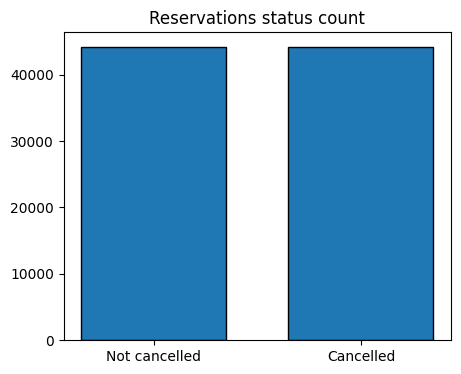

In [ ]:
plt.figure(figsize=(5,4))
plt.title("Reservations status count")
plt.bar(['Not cancelled','Cancelled'],df['is_canceled'].value_counts(),edgecolor='k',width=0.7)
plt.show()

TypeError: Bbox.from_bounds() missing 3 required positional arguments: 'y0', 'width', and 'height'

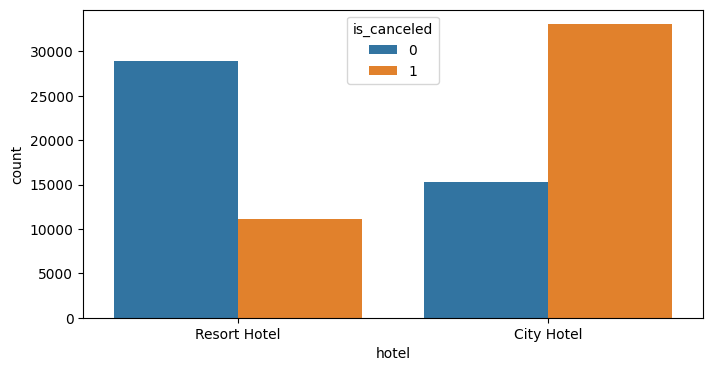

In [ ]:
plt.figure(figsize=(8,4))
ax1=sns.countplot(x='hotel',hue='is_canceled',data=df)
legend_labels,_=ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor={1,1})
plt.title("Reservation status in different hotels",size=20)
plt.xlabel('hotel')
plt.ylabel('Number of reservations')

In [ ]:
resort_hotel=df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize='True')

0    0.722366
1    0.277634
Name: is_canceled, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88360 entries, 0 to 88360
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           88360 non-null  object        
 1   is_canceled                     88360 non-null  int64         
 2   lead_time                       88360 non-null  int64         
 3   arrival_date_year               88360 non-null  int64         
 4   arrival_date_month              88360 non-null  object        
 5   arrival_date_week_number        88360 non-null  int64         
 6   arrival_date_day_of_month       88360 non-null  int64         
 7   stays_in_weekend_nights         88360 non-null  int64         
 8   stays_in_week_nights            88360 non-null  int64         
 9   adults                          88360 non-null  int64         
 10  babies                          88360 non-null  int64         
 11  me

In [ ]:

city_hotel = df[df['hotel'] == 'City Hotel']
city_canceled_perc = city_hotel['is_canceled'].value_counts(normalize=True)
print(city_canceled_perc)


1    0.684369
0    0.315631
Name: is_canceled, dtype: float64


In [ ]:
resort_hotel=resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel=city_hotel.groupby('reservation_status_date')[['adr']].mean()

In [ ]:
import seaborn as sns

In [ ]:
import pandas as pd
df=pd.read_csv('/content/hotel_booking.csv')


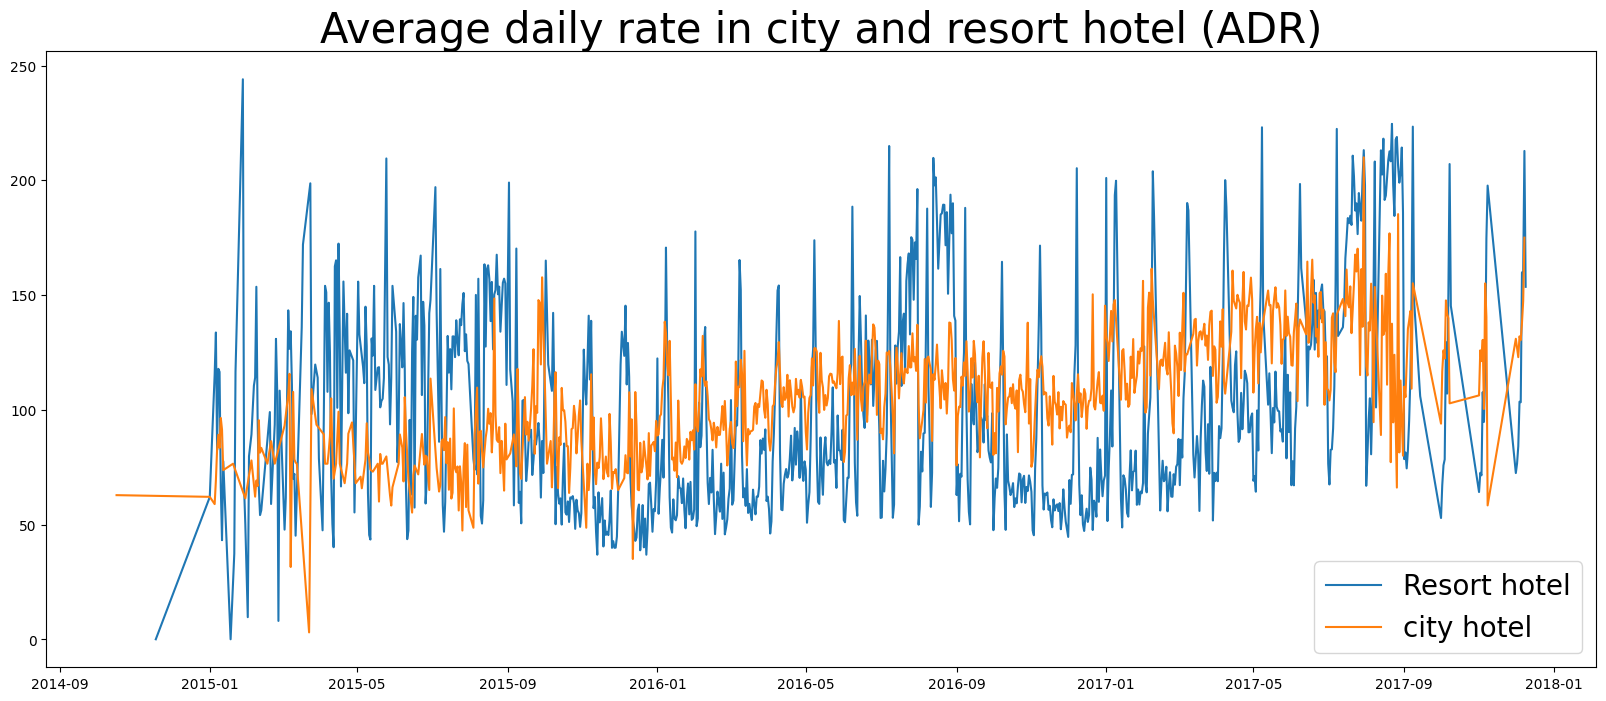

In [ ]:
plt.figure(figsize=(20,8))
plt.title('Average daily rate in city and resort hotel (ADR)',fontsize=30)
plt.plot(resort_hotel.index,resort_hotel['adr'],label='Resort hotel')
plt.plot(city_hotel.index,city_hotel['adr'],label='city hotel')
plt.legend(fontsize=20)
plt.show()

In [ ]:


df['month'] = df['reservation_status_date'].dt.month


In [ ]:

df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize=(16,8))
ax1=sns.countplot(x='month',hue='is_canceled',date=df)
plt.ylabel('Number of reservations')
plt.legend(['not cancelled','cancelled'])
plt.show()

ValueError: Could not interpret value `month` for `x`. Value is a string, but `data` was not passed.

<Figure size 1600x800 with 0 Axes>

In [ ]:
cancelled_data=df[df['is_canceled']==1]
print(cancelled_data.columns)


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'babies', 'meal', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'month'],
      dtype='object')


In [ ]:
top_10_country=cancelled_data['country'].value_counts().head(10)

KeyError: 'country'

In [ ]:
cancelled_data['market_segment'].value_counts(normalize='True')

Online TA        0.469407
Groups           0.273830
Offline TA/TO    0.188062
Direct           0.043620
Corporate        0.022025
Complementary    0.001992
Aviation         0.001019
Undefined        0.000045
Name: market_segment, dtype: float64

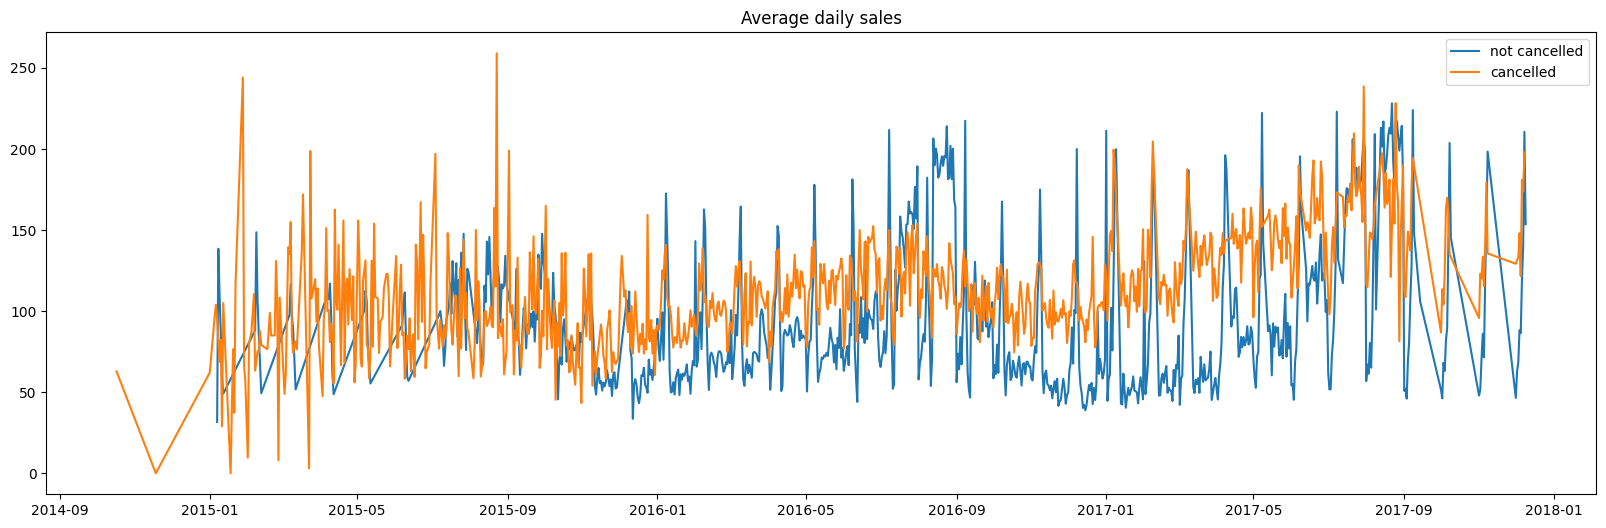

In [ ]:
cancelled_data = df[df['is_canceled'] == 1]

# Calculate the average daily ADR for cancelled reservations
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace=True)
cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

# Filter the DataFrame to get not cancelled reservations
not_cancelled_data = df[df['is_canceled'] == 0]

# Calculate the average daily ADR for not cancelled reservations
not_cancelled_data_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_data_adr.reset_index(inplace=True)
not_cancelled_data_adr.sort_values('reservation_status_date', inplace=True)

# Plot the average daily ADR for cancelled and not cancelled reservations
plt.figure(figsize=(20, 6))
plt.title('Average daily sales')
plt.plot(not_cancelled_data_adr['reservation_status_date'], not_cancelled_data_adr['adr'], label='not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label='cancelled')
plt.legend()
plt.show()

In [ ]:
cancelled_df_adr=cancelled_df_adr(['reservation_status_date']>'2016') &(cancelled_df_adr['reservation_status_date']<'2017-09')
not_cancelled_df_adr=not_cancelled_df_adr(['reservation_status_date']>'2016') &(not_cancelled_df_adr['reservation_status_date']<'2017-09')



TypeError: '>' not supported between instances of 'list' and 'str'

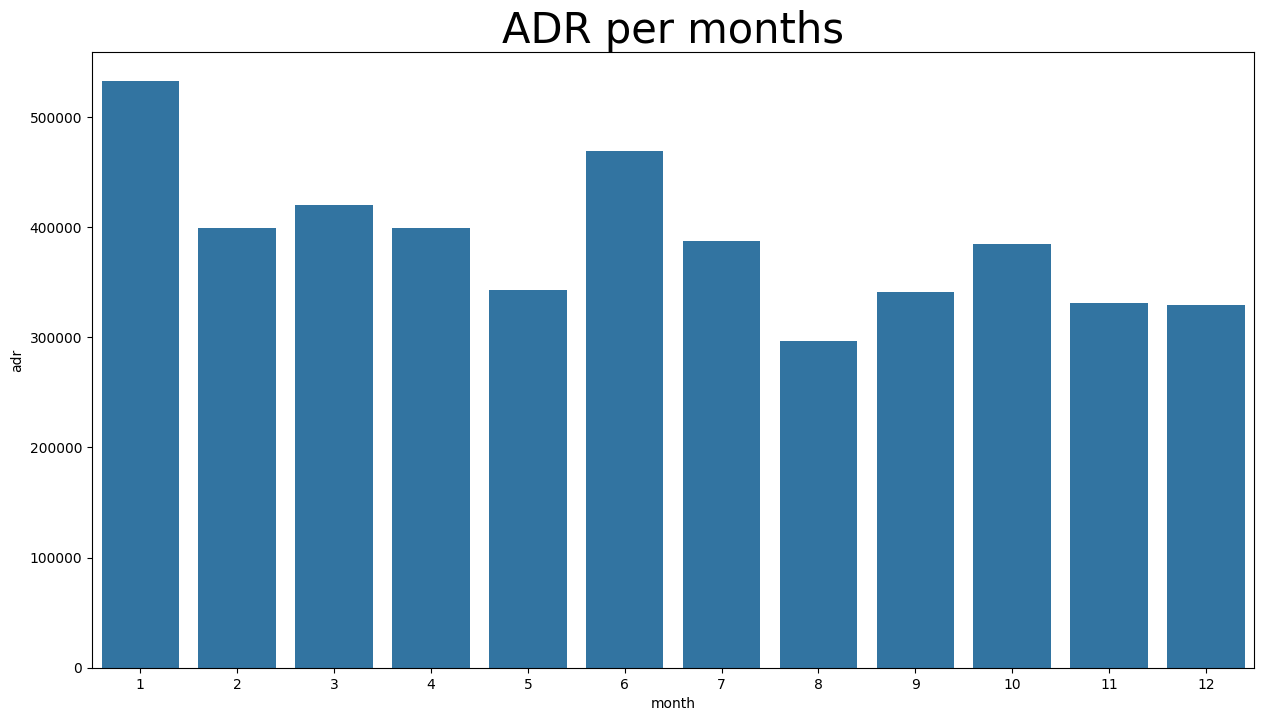

In [ ]:
plt.figure(figsize=(15,8))
plt.title('ADR per months',fontsize=30)

df_filtered=df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index()
sns.barplot(x='month',y='adr',data=df_filtered)
plt.show()